In [2]:
#1.Data Preprocessing

In [3]:
#Importing the libraries
import numpy as np       
import matplotlib.pyplot as plt   
import pandas as pd  

In [4]:
dataset = pd.read_csv('Banks/ADBL.csv',index_col=0)
dataset

,Symbol,Date,Open,High,Low,Close,Vol
0,ADBL,2011-03-20,132.0,134.0,131.0,133.0,"1,507.00"
15,ADBL,2011-03-24,135.0,136.0,129.0,133.0,"3,116.00"
31,ADBL,2011-03-25,133.0,135.0,132.0,135.0,"2,560.00"
47,ADBL,2011-03-27,135.0,135.0,134.0,134.0,"2,110.00"
61,ADBL,2011-03-28,134.0,134.0,130.0,130.0,"1,288.00"
...,...,...,...,...,...,...,...
49948,ADBL,2021-02-23,460.0,460.0,446.0,455.0,"61,301.00"
49974,ADBL,2021-02-24,477.0,477.0,453.0,459.0,"76,992.00"
50000,ADBL,2021-02-25,466.0,466.0,450.0,455.0,"60,468.00"
50026,ADBL,2021-02-28,450.0,450.0,438.0,441.0,"87,385.00"


In [5]:
dataset=dataset.dropna()

In [6]:
dataset

,Symbol,Date,Open,High,Low,Close,Vol
0,ADBL,2011-03-20,132.0,134.0,131.0,133.0,"1,507.00"
15,ADBL,2011-03-24,135.0,136.0,129.0,133.0,"3,116.00"
31,ADBL,2011-03-25,133.0,135.0,132.0,135.0,"2,560.00"
47,ADBL,2011-03-27,135.0,135.0,134.0,134.0,"2,110.00"
61,ADBL,2011-03-28,134.0,134.0,130.0,130.0,"1,288.00"
...,...,...,...,...,...,...,...
49948,ADBL,2021-02-23,460.0,460.0,446.0,455.0,"61,301.00"
49974,ADBL,2021-02-24,477.0,477.0,453.0,459.0,"76,992.00"
50000,ADBL,2021-02-25,466.0,466.0,450.0,455.0,"60,468.00"
50026,ADBL,2021-02-28,450.0,450.0,438.0,441.0,"87,385.00"


In [7]:
dataset_train , dataset_test = dataset.head(1776) , dataset.tail(445)

In [8]:
dataset_train

,Symbol,Date,Open,High,Low,Close,Vol
0,ADBL,2011-03-20,132.0,134.0,131.0,133.0,"1,507.00"
15,ADBL,2011-03-24,135.0,136.0,129.0,133.0,"3,116.00"
31,ADBL,2011-03-25,133.0,135.0,132.0,135.0,"2,560.00"
47,ADBL,2011-03-27,135.0,135.0,134.0,134.0,"2,110.00"
61,ADBL,2011-03-28,134.0,134.0,130.0,130.0,"1,288.00"
...,...,...,...,...,...,...,...
38582,ADBL,2019-01-23,343.0,344.0,342.0,343.0,"2,273.00"
38608,ADBL,2019-01-24,344.0,344.0,342.0,342.0,"16,140.00"
38634,ADBL,2019-01-27,342.0,342.0,339.0,339.0,"4,235.00"
38660,ADBL,2019-01-28,339.0,345.0,338.0,342.0,"8,647.00"


In [9]:
dataset_test

,Symbol,Date,Open,High,Low,Close,Vol
38712,ADBL,2019-01-30,340.0,341.0,339.0,339.0,"3,892.00"
38738,ADBL,2019-01-31,342.0,342.0,339.0,339.0,"5,850.00"
38764,ADBL,2019-02-03,337.0,340.0,337.0,338.0,"12,977.00"
38790,ADBL,2019-02-04,338.0,340.0,335.0,339.0,"13,265.00"
38816,ADBL,2019-02-05,340.0,340.0,338.0,338.0,"5,648.00"
...,...,...,...,...,...,...,...
49948,ADBL,2021-02-23,460.0,460.0,446.0,455.0,"61,301.00"
49974,ADBL,2021-02-24,477.0,477.0,453.0,459.0,"76,992.00"
50000,ADBL,2021-02-25,466.0,466.0,450.0,455.0,"60,468.00"
50026,ADBL,2021-02-28,450.0,450.0,438.0,441.0,"87,385.00"


In [10]:
training_set=dataset_train.iloc[:,5:6].values
training_set 

array([[133.],
       [133.],
       [135.],
       ...,
       [339.],
       [342.],
       [341.]])

In [11]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled

array([[0.03579418],
       [0.03579418],
       [0.03803132],
       ...,
       [0.26621924],
       [0.26957494],
       [0.26845638]])

In [12]:
X_train=[]
y_train=[]
for i in range(60,1776):
    X_train.append(training_set_scaled[i-60:i , 0])
    y_train.append(training_set_scaled[i , 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train

array([[0.03579418, 0.03579418, 0.03803132, ..., 0.03243848, 0.03914989,
        0.05145414],
       [0.03579418, 0.03803132, 0.03691275, ..., 0.03914989, 0.05145414,
        0.05145414],
       [0.03803132, 0.03691275, 0.03243848, ..., 0.05145414, 0.05145414,
        0.04362416],
       ...,
       [0.28076063, 0.28076063, 0.27628635, ..., 0.27069351, 0.27069351,
        0.26957494],
       [0.28076063, 0.27628635, 0.27740492, ..., 0.27069351, 0.26957494,
        0.26621924],
       [0.27628635, 0.27740492, 0.28299776, ..., 0.26957494, 0.26621924,
        0.26957494]])

In [14]:
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [15]:
#2 Building RNN

In [16]:
#importing keras library and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [17]:
#Initialising the RNN
regressor = Sequential()

In [18]:
#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [19]:
#Adding a second LSTM layer and some Droput regularisation
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [20]:
#Adding a third LSTM layer and some Droput regularisation
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [21]:
#Adding a fourth LSTM layer and some Droput regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [22]:
#Adding the output Layer
regressor.add(Dense(units = 1))

In [23]:
#Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100,batch_size = 32)

Epoch 1/100
54/54 [==============================] - 8s 67ms/step - loss: 0.0264
Epoch 2/100
54/54 [==============================] - 4s 66ms/step - loss: 0.0035
Epoch 3/100
54/54 [==============================] - 4s 66ms/step - loss: 0.0033
Epoch 4/100
54/54 [==============================] - 4s 65ms/step - loss: 0.0028
Epoch 5/100
54/54 [==============================] - 4s 65ms/step - loss: 0.0032
Epoch 6/100
54/54 [==============================] - 3s 65ms/step - loss: 0.0035
Epoch 7/100
54/54 [==============================] - 3s 65ms/step - loss: 0.0022
Epoch 8/100
54/54 [==============================] - 4s 65ms/step - loss: 0.0022
Epoch 9/100
54/54 [==============================] - 3s 59ms/step - loss: 0.0031
Epoch 10/100
54/54 [==============================] - 3s 61ms/step - loss: 0.0025
Epoch 11/100
54/54 [==============================] - 4s 65ms/step - loss: 0.0023
Epoch 12/100
54/54 [==============================] - 4s 68ms/step - loss: 0.0025
Epoch 13/100
54/54 [=====

In [25]:
#3.Making the prediction and visualising the results
regressor.save("models/ADBL.h5")

In [26]:
#Getting the real stock price of next months
#dataset_test = pd.read_csv('ADBL_test_data.csv')
real_stock_price = dataset_test.iloc[:,5:6].values

In [28]:
#Getting the predicted stock price of next month
dataset_total = pd.concat((dataset_train['Close'],dataset_test['Close']),axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,506):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

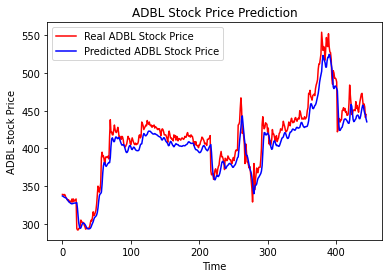

In [29]:
plt.plot(real_stock_price, color = 'red', label = 'Real ADBL Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted ADBL Stock Price')
plt.title('ADBL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ADBL stock Price')
plt.legend()
plt.show()
